##### Python for High School (Summer 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_July_26_2022.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_July_26_2022.ipynb)

### Logarithms

![log keys](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logarithm_keys.jpg/320px-Logarithm_keys.jpg)

[Attribution](https://commons.wikimedia.org/wiki/File:Logarithm_keys.jpg)

In this chapter we're focusing on a function key present on any scientific calculator, which, as a rule of thumb, makes it topical in high school math courses.  The "log" key is the key in question.  In Python, you could say it's opposite (or inverse) is the "pow" key (not that Python has keys, but it has functions).

When are logs used?  Many times, we are confronted by what's called exponential growth and/or exponential shrinkage.  If every few days, we have twice as much, that's exponential growth. If we have half as much, with each passing interval, that could be considered following the same curve, to the left instead of the right.

Two examples of log scales you may have heard of:  the Decibel scale and the Richter scale.

[The Decibel scale](https://en.wikipedia.org/wiki/Decibel) (named for Alexander Graham Bell) is used to measure loudness.  [Linked Youtube](https://youtu.be/WZLQoP6CM0k). An increase of 6 to 10 decibels roughly doubles perceived loudness.

[The Richter scale](https://en.wikipedia.org/wiki/Richter_magnitude_scale) (named for Charles Francis Richter) is used to measure the severity of earthquakes.  [Linked Youtube](https://youtu.be/1qbg7orb1lc).  An increase of 1 unit signifies a 10-fold increase in the earthquake's energy level.

These YouTubes have been embedded in the final Gallery section, along with some others.  If you view a  publicly stored version of this notebook through nbviewer (cut and paste the URL), those YouTubes may come across as both as viewable and playable, as they would on a locally stored and trusted version.

### Starting with a Power curve:

What we would like, is to find the horizontal X axis position along an exponential curve, to reach a target number on the curve, its height of the Y axis.  

For example, to reach a vertical reading of 1000, we might need an X value of 3, whereas to reach 100 would take only 2 and x = 10 would be the Y value above x = 1.  

Are we simply counting the zeros {1000:3, 100:2, 10:1, 1:0}?  

It's more complicated than that, as every number in between will have some corresponding exponent also.  When 10 is our base, we will hit those points:  (1000, 3), (100, 2) and (10, 1).

In [1]:
from math import log, log10

In [2]:
y_values = range(1,1001)
x_values = [log10(y) for y in y_values]
table = dict(zip(y_values, x_values))

In [3]:
table[100]

2.0

In [4]:
table[1000]

3.0

In [5]:
table[15]  # what exponent of 10 do I need to reach 15?

1.1760912590556813

In [6]:
10 ** table[15]  # lets check that... close enough for floating point

15.000000000000004

In [7]:
import pandas as pd  # lets start using pandas for plotting

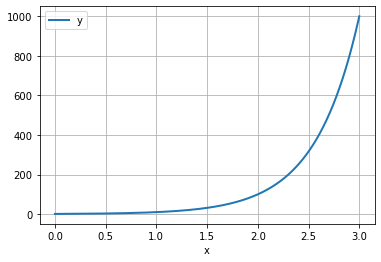

In [8]:
# pow curve
pd.DataFrame({'x':table.values(),'y':table.keys()}).plot(x='x',y='y',lw=2, grid=True);

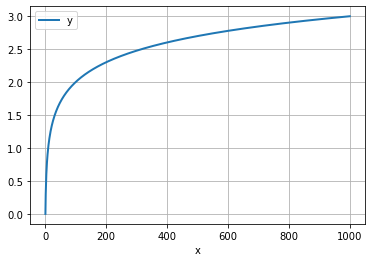

In [9]:
# reversing x with y gives the inverse function
# log curve
pd.DataFrame({'x':table.keys(),'y':table.values()}).plot(x='x',y='y',lw=2, grid=True);

Lets play the game of "hitting the target" by dialing in an exponenet for base b.  To what must I raise b, to hit my target?  Say b is 2:

In [10]:
b = 2         # base (change base)
target = 256  # raise b to what power to get target? (change target)

answer = log(target, b)  # in the old days, maybe look it up in a big table 
answer

8.0

**Exercise**

Think of "hit my target" as a looping game with an input prompt, and a "too high" "too low" pair of hints.  Once the guesser gets it right to three significant digits, the game ends.  Q to quit any time.  What would the code look like?

To get you started:

In [11]:
from random import randint

def game():
    target = randint(0, 100)
    exponent = log10(target)  # what to guess

    playing = True
    while playing:
        answer = input("Raise 10 to what power to get {target}? > ")
        if answer.upper() == "Q":
            playing = False
            continue
        # check if answer.isdigit, answer too high or too low or just right

In [12]:
# game()

Why not a long irrational-looking floating point value for an answer, in the case of $\log_{2}(256)$?  Because 256 is a whole number power of 2.  Numbers that are not whole number powers get these "many significant digit" answers.

In [14]:
checking = pow(b, answer)    # show that we hit the target, up above
checking

256.0

In [15]:
answer = log(77, 2)     # not a whole number power of 2
answer

6.266786540694902

In [16]:
checking = pow(2, answer)
checking

77.00000000000003

In [17]:
b = 10
target = 10000
log(target, b)

4.0

In [18]:
log(77, 10) 

1.8864907251724818

The log of a huge target number need not itself be be huge, as a rule of thumb, because raising a base to a power is a fast way to shrink and grow i.e. exponentially.

With X in the role of exponenet, it covers a huge breadth of verticality, from insect height to mountain height.

The idea is to fit our desired range, from very tiny to very large, within the domain of a reasonably-wide X, say from -10 to 10.

In [19]:
log10(14892349939984940)  # log base 10 of a large number

16.172963232704753

**What we're also exercising and talking about in this Notebook:**

* your ability to embed standard math notations in Jupyter Markdown cells, by means of $\LaTeX$, a way of encoding math typography, and ultimately, entire books using $\TeX$.

* your ability to plot a function, as you might on a graphing calculator, starting with data, using `pandas` and `matplotlib`, both 3rd party Python packages, which in turn depend on `numpy`.

### Getting the Log of N

The the idea of getting the logarithm of a number is the inverse of raising a number to a power.

Ask yourself:  "what number would I have to raise a number **b** to, to get another number **N**?"  That first number, **b** is your base, and with that you want to find the "log" (to that base) of your target number **N**.

$$
\log_{b}(N)
$$

For example, I would have to raise 10 to the 2nd power to get 100.  That means the base 10 log of 100 is 2.

$$
\log_{10}(100) = 2
$$

To what power would I need to raise the number 2 to get 100?  That's the same as asking "what is the base 2 log of 10?"

In [20]:
pow(2, 5)  ## too low

32

In [21]:
pow(2, 7)  ## too high, but closer

128

In [22]:
pow(2, 6.7)  # very close

103.96830673359815

Lets use Python to find a more precise answer:

In [23]:
from math import log

In [24]:
? log

Docstring:
log(x, [base=math.e])
Return the logarithm of x to the given base.

If the base not specified, returns the natural logarithm (base e) of x.
Type:      builtin_function_or_method


In [25]:
log(100, 2)

6.643856189774725

That's it!

$$
\log_{2}(100) \approx 6.643856189774725
$$

In [26]:
2 ** 6.643856189774725  # same as pow(2, 6.643856189774725)

100.00000000000004

In [27]:
log(100, 10)

2.0

Back in the days before electronic calculators, engineers used slide rules.  You could multiply two large numbers by adding their logarithms.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/51764518@N02/41646298500/in/pool-55459290@N00/" title="Vintage Aristo Darmstadt Slide Rule, Model 867U, Transparent Linear Scale, Back Advertising - Gildemeister &amp; Company, 6-Inch, Made In Hamburg Germany, Circa 1960s"><img src="https://live.staticflickr.com/838/41646298500_2a359d5fcc.jpg" width="500" height="281" alt="Vintage Aristo Darmstadt Slide Rule, Model 867U, Transparent Linear Scale, Back Advertising - Gildemeister &amp; Company, 6-Inch, Made In Hamburg Germany, Circa 1960s"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

[Attribution](https://flic.kr/p/26s9aBj)

For example, suppose I wanted to multiply 185 by 987.  The slide rule showed numbers as powers of some base.

In [28]:
import math
from math import log10  # Python as a special function for base 10

What power of 10 gives me 185?  

`10**2` means 10 times 10 in Python and equals 100.  

`10**3` means 10 times 10 times 10 and equals 1000.  

However we're allowed to have fractional exponents, so an exponent of 10 just a tad more than 2 should do it.

In [29]:
log10(185)

2.2671717284030137

Likewise 987 is close to 1000, so an exponent of almost 3 is not that surprising.  The log10 function figures out a precise answer.

In [30]:
log10(987)

2.9943171526696366

Now we add these two exponents...

In [31]:
log10(185) + log10(987)

5.26148888107265

... and now raise 10 to that power, to get our final answer.

On a slide rule, we could read these values (to fewer decimal places) off the sliding sticks.  

We had the results of a multiplication, but thanks to logs, we got there by addition.  Someone good with a slide rule could get precise enough answers quite quickly.

In [32]:
log_sum = log10(185) + log10(987)
pow(10, log_sum)

182594.9999999999

In [33]:
185 * 987  # checking

182595

In general:  `a * b == pow(10, log10(a) + log10(b))`

or, using our friend $\LaTeX$, the typesetting language understood by Jupyter:

$$
(A)(B) = b^{\log_b(A) + \log_{b}(B)}
$$ 

What this shows is a way of turning a multiplication problem into an addition problem.  Adding is simpler than multiplying, if working by hand.  When logs were first invented, this was their most valued application:  to provide a short cut to multiplication.  Lookup tables played a role.  You could look up log to the base 10 of A and B, add them, and then look up 10 to the answer power, to get A times B.  You have reached your product by adding and consulting tables.

With floating point numbers, as with lookup tables, precise equality with the desired outcome is not assured.  The answer for A times B will only have so many significant digits. 

The math module has an `isclose` we can use, which means "almost equal".  This function comes in handy when working with floating point numbers, whereas asking for precise equality can be dangerous, as one may never get it, even when one would, were these numbers entirely precise.

In [34]:
? math.isclose

Signature:  math.isclose(a, b, *, rel_tol=1e-09, abs_tol=0.0)
Docstring:
Determine whether two floating point numbers are close in value.

  rel_tol
    maximum difference for being considered "close", relative to the
    magnitude of the input values
  abs_tol
    maximum difference for being considered "close", regardless of the
    magnitude of the input values

Return True if a is close in value to b, and False otherwise.

For the values to be considered close, the difference between them
must be smaller than at least one of the tolerances.

-inf, inf and NaN behave similarly to the IEEE 754 Standard.  That
is, NaN is not close to anything, even itself.  inf and -inf are
only close to themselves.
Type:      builtin_function_or_method


In [35]:
def test_log(a, b):
    return math.isclose(a * b, pow(10, log10(a) + log10(b)))

In [36]:
test_log(185, 987)

True

In [37]:
test_log(17, 8947)

True

Before electronic calculators, the "computers" (people who computed) would use giant lookup tables, same for trig functions.

![log tables](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Abramowitz%26Stegun.page97.agr.jpg/640px-Abramowitz%26Stegun.page97.agr.jpg)

[Attribution](https://commons.wikimedia.org/wiki/File:Abramowitz%26Stegun.page97.agr.jpg)

### Plotting Logarithmic and Exponential Functions



In [38]:
import pandas as pd
import numpy as np

In [39]:
domain = np.linspace(0.1, 1000, 200) # give me 200 points between .1 and a thousand
log10_range = np.log10(domain)

In [40]:
df1 = pd.DataFrame({"Domain": domain, "Log 10": log10_range})
df1.tail()

,Domain,Log 10
195,979.901508,2.991182
196,984.926131,2.993404
197,989.950754,2.995614
198,994.975377,2.997812
199,1000.000000,3.000000


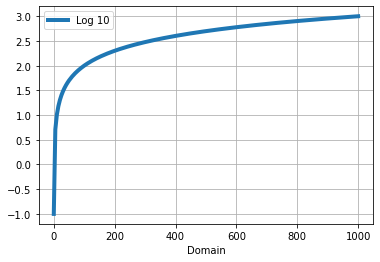

In [41]:
df1.plot(x="Domain", y="Log 10", grid=True, lw=4);

In [42]:
pow_range = np.power(10, log10_range)

In [43]:
df2 = pd.DataFrame({"Domain": log10_range, "10 ** x": pow_range})
df2.head()

,Domain,10 ** x
0,-1.000000,0.100000
1,0.709662,5.124623
2,1.006434,10.149246
3,1.181096,15.173869
4,1.305319,20.198492


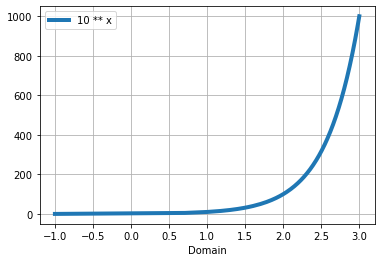

In [44]:
df2.plot(x="Domain", y="10 ** x", grid=True, lw=4);

Getting a little fancier, we can put two plots into one figure, by means of subplots.  

To do this, we need to import another library that pandas has been using all along.  Now we would like to gain more control of the nitty gritty details, so we import it and talk to it directly.  About our subplots.

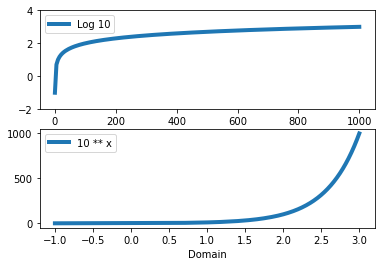

In [45]:
import matplotlib.pyplot as plt

# makes two subplots, each with its own axis object in axes
fig, axes = plt.subplots(nrows=2, ncols=1, sharey=False, sharex=False)

axes[0].set_ylim(-2, 4) # set the vertical limits on the first axis object

# df1, df2 are pandas DataFrames, which will plot on their own, but
# here we direct them to use the axis objects associated with each 
# subplot

df1.plot(x="Domain", y="Log 10",   ax=axes[0], lw=4)
df2.plot(x="Domain", y="10 ** x",  ax=axes[1], lw=4);

### Natural Logarithms

We're not done with the story of logarithms.  Logarithms of many bases have suggested themselves.  We might even use an irrational base.

In [46]:
from math import log
import math

In [47]:
log(math.pi ** 3, math.pi)

3.0

Suprisingly, there is a "best base" or at least one that stands out as the most natural.  The number has many interesting properties.  One of them is, the exponential curve for this number has a y coordinate equal to its slope.

$$
e^{x} \approx \frac{e^{x+h} - e^{x}}{h}
$$

High school topics include some calculus.  Here is one of those times, as we're interested in the slope of a curve at a specific point.  The slope of a curve is "rise over run" meaning how much it changes vertically versus how much it (the curve) changes horizontally.  We set our horizontal change to a tiny h (h for horizontal) and see how much wiggling x, wiggles y.

What's the change in the y coordinate, per a tiny (to infinitessimal) change in x?

As h goes to 0, the result gets more precise:

$$
\lim_{h \to 0} \frac{e^{x+h} - e^{x}}{h} = e^{x}
$$

From another point of view, the skill in focus here, possibly getting some exercise, is maybe not calculus so much, as that of typesetting.  How does one get standard math notations to appear in a Notebook short of taking screen shots?  

Here is where $\LaTeX$ fits in, as a puzzle piece and as a workout opportunity that pays off in the long run.  

**Exercise**

On your local device, pop open a Markdown cell and practice entering some mathy expressions, you're more than welcome to use any of those here.  In Markdown, we use single or double dollar signs to signal "LaTeX Within".  

* Single dollar signs when embedded in a sentence
* Double dollar when centering math expressions in their own "div boxes" (HTML-speak).

### How Steep?

We frequently encounter the phenomenon of "gradient" in life, meaning an uphill or downhill path, most simply.  

Steps count, as providing gradients and they're manageably steep we hope, except to babies, others with different abilities.

We may speak of a "learning curve" again using steps as a metaphor.  When the steps get too steep, we feel frustrated by the inaccessibility of this path, unless we're rock climbers of some kind.

Thinking back to our work with graphs, one might add "steepness" as a characteristic of an edge.  In electric circuits, edges stand for wires and may come with voltage drops associated with resistence and loads.

A roller coaster is a great example of a curving track of varying slope.  In riding a roller coaster, we experience the changing acceleration, perhaps as exhileration.

When looking at a curve, we see varying steepness, which we define as vertical change per horizontal change.  When a curve is rising steeply to my right, that means if I step right just a little, the y-position over my head is skyrocketing.  It may double in altitude with every step to my right.  

Real projectiles would not behave in this way, doubling in speed indefinitely.  A mathematical curve is the construct of our imaginations.

The solution Newton and others came up with, for measuring the slope of a curve at any given point, was to wiggle the X-axis position a tiny bit, by adding some h (a step to the right), and seeing how that changed Y.  

The ratio of the change in y -- a function of x, so f(x) -- to the change in h, could be expressed as:

$$
\frac{f(x+h) - f(x)}{h}
$$

where x is allowed to vary, giving us changing slopes (potentially) throughout the curve.  x is where we make our measurement of "steepness" or "slope".  A curve may slope up (positive) or slope down (negative).  A curve with 0 slope at a point, is momentarily tangent to a perfectly horizontal straight line.

In [48]:
def slope_at(x, h=1e-8):
    """
    Our measuring technique:  change x (horizontal) a very tiny bit 
    and ratio that with the resulting change in y (vertical)
    """
    return (math.exp(x+h) - math.exp(x))/h

In [49]:
slope_at(4)  # pretty steep already

54.59815000108392

Looking at the curve below, we see by x = 4 we have already left the ground and are climbing steeply past 50.

In [50]:
domain = np.linspace(0, 6, 100)
exp_range = np.exp(domain) # e to these powers
df3 = pd.DataFrame({"Domain": domain, "e ** x": exp_range})
df3.head()

,Domain,e ** x
0,0.000000,1.000000
1,0.060606,1.062480
2,0.121212,1.128864
3,0.181818,1.199396
4,0.242424,1.274335


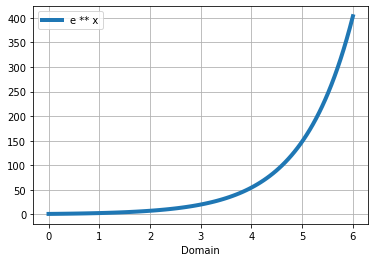

In [51]:
df3.plot(x="Domain", y="e ** x", grid=True, lw=4);

Now let's zoom out by computing over a wider domain.  Note that the y-axis is in units of many thousands, don't let those single digits fool you.

In [52]:
domain = np.linspace(-5, 20, 100)
exp_range = np.exp(domain) # e to these powers
df4 = pd.DataFrame({"Domain": domain, "e ** x": exp_range})
df4.head()

,Domain,e ** x
0,-5.000000,0.006738
1,-4.747475,0.008674
2,-4.494949,0.011165
3,-4.242424,0.014373
4,-3.989899,0.018502


In [53]:
df4.sample(10)

,Domain,e ** x
6,-3.484848,3.065840e-02
35,3.838384,4.645034e+01
83,15.959596,8.534232e+06
86,16.717172,1.820436e+07
70,12.676768,3.202213e+05
20,0.050505,1.051802e+00
73,13.434343,6.830637e+05
19,-0.202020,8.170784e-01
69,12.424242,2.487596e+05
84,16.212121,1.098588e+07


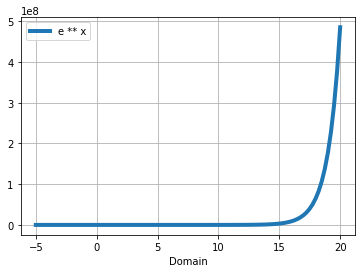

In [54]:
df4.plot(x="Domain", y="e ** x", grid=True, lw=4);

In exercising with the cells below, changing arguments, you will find that the slope as computed by our measuring technique, with tiny h, is very close to the y-axis value of the curve at that same point.  The curve is registering as own slope as it goes, starting from extremely flat (slope almost 0) and transitioning to extremely vertical.

In [55]:
slope = slope_at(-4)  # close to 0 slope
slope

0.018315638936061696

In [56]:
pow(math.e, -4) # almost the same (off because h > 0)

0.018315638888734186

In [57]:
math.exp(4) - slope_at(4)  # almost the same

3.206031351510319e-08

In [58]:
slope_at(1) # reveals our base (approximately)

2.7182818218562943

In [59]:
math.exp(1)

2.718281828459045

That's the number.  We call it `e`.

In [60]:
math.e

2.718281828459045

A log to this base has it's own symbol, LN for Natural Log, although more often it's written in lowercase. $\ln(x)$

In Python, the `log` function we've been using all along, uses base e as its default.

In [61]:
log(1000)

6.907755278982137

In [62]:
log(1000, math.e)

6.907755278982137

### Exploring e with Sympy

If you have sympy installed, then you're equipped to explore the wonderful world of a computer-assisted algebra system (CAS).  Sympy will help you check your concepts, including in calculus.

In [63]:
import sympy as sym

In [64]:
sym.exp(1)

E

In [65]:
print(sym.exp(1).evalf(100))

2.718281828459045235360287471352662497757247093699959574966967627724076630353547594571382178525166427


Here we're differentiating, meaning asking for a function that will give the rate at which $e^{x}$ is changing (the "slope") at any x.  

As we have seen, this function is $e^{x}$ itself.

In [66]:
x = sym.Symbol('x')
sym.diff(sym.exp(x))

exp(x)

The way we write that in calculus is:

$$
\dfrac{d e^{x}}{dx}  = e^{x} 
$$

Here's a means for approaching e to whatever degree of precision you wish.

In [67]:
n = sym.Symbol('n')
expr = (1 + 1/n)**n
expr

(1 + 1/n)**n

What happens as n grows larger and larger?  

The exponent tends to make the number bigger, since it's greater than 1.  But 1/n gets smaller, meaning the number being raised to the nth power is getting ever closer to exactly 1.

The tension between these two tendencies, to blow up because of exponentiation vs to settle on 1 because of the vanishing difference from 1, actually resolves to a specific number, the number e.

$$
\lim_{n \to \infty} (1 + 1/n)^{n} = e
$$

Sympy lets us compute that limit directly, for a symbolic answer.

In [68]:
sym.limit(expr, n, sym.oo)

E

How about the area under the $e^{x}$ curve?  The operation of "accumulating" (integration) is the opposite of "slicing thinly" (differentiation).

In [69]:
sym.integrate(sym.exp(x), x)

exp(x)

In [70]:
sym.integrate(sym.exp(x), (x, -sym.oo, 1))

E

In [71]:
sym.integrate(sym.exp(x), (x, -sym.oo, math.e))

15.1542622414793

In [72]:
math.exp(math.e)

15.154262241479262

We get to read off the area under the curve by reading the y-coodinate, just as we're able to read the slope the same way.  The slope at exp(x) matches the area under the curve up to that point x.

So we get a sense that e is indeed a "special number" in the Mathematics Hall of Fame.

### Segue to Probability Studies

Data Science. Statistics. Casino Math... 

The field goes by many names and nicknames, and has to do with likelihood and expectations, and whether a sample size is "good enough" for predicting the characteristics of a larger population.

At this juncture, showing $e$ working in tandem with $\pi$ to give us a Gaussian, along with the typesetting, reinforces the $e$ deserves its Hall of Fame status.

In [73]:
x, σ, μ, f = sym.symbols(['x','σ', 'μ', 'f'])
expr1 = (1/(σ * sym.sqrt(2 * sym.pi)))
expr2 = sym.exp(sym.Rational(-1,2) * ((x - μ)/σ)**2)
gaussian = expr2 * expr1
standard = gaussian.copy()
standard = standard.subs(μ, 0)
standard = standard.subs(σ, 1)
standard

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

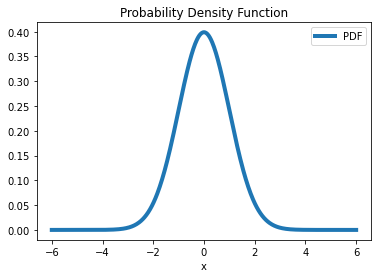

In [74]:
domain = np.linspace(-6, 6, 500)
f = sym.lambdify(x, standard, 'numpy') 
bell_curve = f(domain)
df5 = pd.DataFrame({'x':domain, 'y':bell_curve})
ax = df5.plot(x='x', y='y', lw=4)
ax.set_title("Probability Density Function");
ax.legend(['PDF']);

### YouTube Gallery


In [2]:
from IPython.display import YouTubeVideo

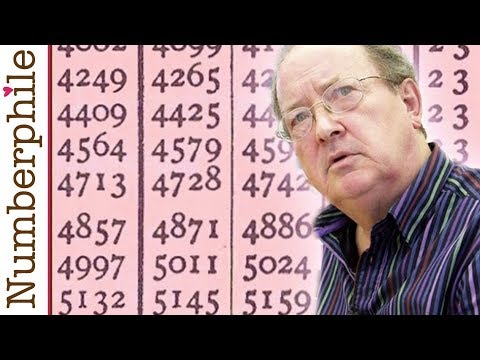

In [3]:
YouTubeVideo("VRzH4xB0GdM")

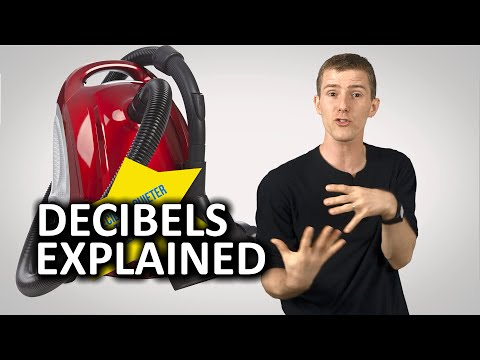

In [76]:
YouTubeVideo("WZLQoP6CM0k") 

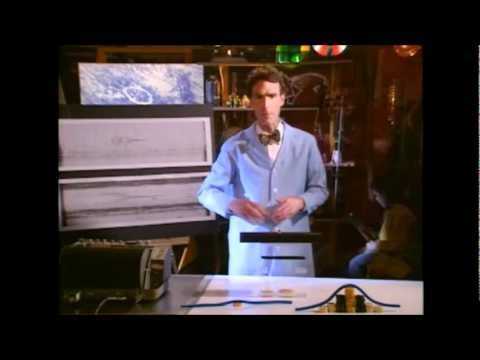

In [77]:
YouTubeVideo("1qbg7orb1lc") # Bill Nye

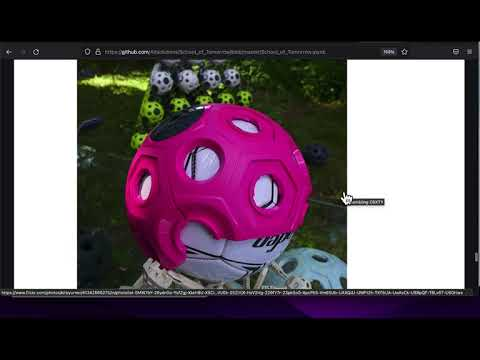

In [78]:
YouTubeVideo("UaGifkgfmWk") # logs, powers, atomic physics